In [3]:
import matplotlib
matplotlib.use('TkAgg')

from numpy import arange, sin, pi
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
# implement the default mpl key bindings
from matplotlib.backend_bases import key_press_handler


from matplotlib.figure import Figure

import sys
if sys.version_info[0] < 3:
    import Tkinter as Tk
else:
    import tkinter as Tk

root = Tk.Tk()
root.wm_title("Embedding in TK")


f = Figure(figsize=(5, 4), dpi=100)
a = f.add_subplot(111)
t = arange(0.0, 3.0, 0.01)
s = sin(2*pi*t)

a.plot(t, s)


# a tk.DrawingArea
canvas = FigureCanvasTkAgg(f, master=root)
canvas.show()
canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)

toolbar = NavigationToolbar2TkAgg(canvas, root)
toolbar.update()
canvas._tkcanvas.pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)


def on_key_event(event):
    print('you pressed %s' % event.key)
    key_press_handler(event, canvas, toolbar)

canvas.mpl_connect('key_press_event', on_key_event)


def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate

button = Tk.Button(master=root, text='Quit', command=_quit)
button.pack(side=Tk.BOTTOM)

Tk.mainloop()
# If you put root.destroy() here, it will cause an error if
# the window is closed with the window manager.

In [1]:

"""" 
This is an example that shows you how to work directly with the agg
figure canvas to create a figure using the pythonic API.

In this example, the contents of the agg canvas are extracted to a
string, which can in turn be passed off to PIL or put in a numeric
array


"""
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from matplotlib.mlab import normpdf
from numpy.random import randn
import numpy

fig = Figure(figsize=(5, 4), dpi=100)
ax = fig.add_subplot(111)

canvas = FigureCanvasAgg(fig)

mu, sigma = 100, 15
x = mu + sigma*randn(10000)

# the histogram of the data
n, bins, patches = ax.hist(x, 50, normed=1)

# add a 'best fit' line
y = normpdf(bins, mu, sigma)
line, = ax.plot(bins, y, 'r--')
line.set_linewidth(1)

ax.set_xlabel('Smarts')
ax.set_ylabel('Probability')
ax.set_title(r'$\mathrm{Histogram of IQ: }\mu=100, \sigma=15$')

ax.set_xlim((40, 160))
ax.set_ylim((0, 0.03))

canvas.draw()

s = canvas.tostring_rgb()  # save this and convert to bitmap as needed

# get the figure dimensions for creating bitmaps or numpy arrays,
# etc.
l, b, w, h = fig.bbox.bounds
w, h = int(w), int(h)

if 0:
    # convert to a numpy array
    X = numpy.fromstring(s, numpy.uint8)
    X.shape = h, w, 3

if 0:
    # pass off to PIL
    from PIL import Image
    im = Image.fromstring("RGB", (w, h), s)
    im.show()

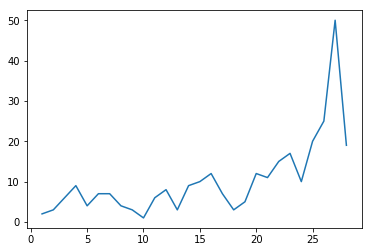

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("sampleText.txt","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()